### Notebook to prepare the full dataset used for training of different models, combining different code throughout this repo


In [166]:
# Importing Libraries

import pandas as pd
import healpy as hp
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [167]:
# Defining important metrics and functions

# Setting NSIDE values
NSIDE = 256
NPIX = hp.nside2npix(NSIDE)
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2pixarea(NSIDE, degrees=True)))


def raDec2thetaPhi(ra, dec):
    return (0.5 * np.pi - np.deg2rad(dec)), (np.deg2rad(ra))


Approximate resolution at NSIDE 256 is 0.23 deg
Approximate resolution at NSIDE 256 is 0.052 deg


### 1. Get a catalogue of all objects in the Galaxy Survey and prepare the north area

### NORTH

In [168]:
df_north = pd.read_csv('../../bricks_data/galaxy_catalogue_north.csv',
                       dtype={'BrickID': 'int32', 'LRG': 'int8', 'ELG': 'int8', 'QSO': 'int8'})


In [169]:
print(df_north.shape)
duplicates_removed = df_north.drop_duplicates()

print(duplicates_removed.shape)

(29914732, 6)
(29914726, 6)


In [170]:
df_north = duplicates_removed

print(len(df_north.BrickID.unique()))

89085


In [171]:
print(df_north.isna().sum())

BrickID       0
RA         7624
DEC        7624
LRG           0
ELG           0
QSO           0
dtype: int64


In [172]:
# Removing all Lines with Nan that were added to ensure that all bricks are stored
df_north = df_north.dropna(axis=0, inplace=False, how='any')

print(len(df_north.BrickID.unique()))
print(len(df_north))

84276
29907102


In [173]:
df_north.head()

BrickID          RA        DEC  LRG  ELG  QSO
0   541202  140.895285  39.405974    0    0    1
1   541202  140.895584  39.576038    0    0    1
2   541202  140.895693  39.403449    0    0    1
3   541202  140.896081  39.479529    0    0    1
4   541202  140.896304  39.621573    0    1    0

### 2. Get Galaxy Count per Healpy Pixel


In [174]:
# LRG

df_LRG = df_north[df_north["LRG"] == 1]
ra_LRG = df_LRG["RA"].to_numpy(copy=True)
dec_LRG = df_LRG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_LRG, dec_LRG)

print("Number of LRGs in Sample:", len(ra_LRG))

LRG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(LRG_pixel_indices, return_counts=True)

print(unique)

mean_LRG = counts.mean()
print("Mean LRGs per Pixel:", mean_LRG)
# Calculating Densities for every block

#density_LRG = (counts / mean_LRG) - 1
id_density = np.stack((unique, counts), axis=1)
#print(id_density)
df_lrg = pd.DataFrame(id_density, columns=['pixel_id', 'lrg'])
df_lrg.pixel_id = df_lrg.pixel_id.astype(int)
df_lrg.head()

Number of LRGs in Sample: 3539661
[  1558   1560   1561 ... 404975 404976 404979]
Mean LRGs per Pixel: 35.394132410731245


pixel_id  lrg
0      1558    2
1      1560    1
2      1561    3
3      1562    1
4      1564    2

In [175]:
# elg

df_ELG = df_north[df_north["ELG"] == 1]
ra_ELG = df_ELG["RA"].to_numpy(copy=True)
dec_ELG = df_ELG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_ELG, dec_ELG)

print("Number of ELGs in Sample:", len(ra_ELG))

ELG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(ELG_pixel_indices, return_counts=True)

print(unique)

mean_ELG = counts.mean()
print("Mean ELGs per Pixel:", mean_ELG)
# Calculating Densities for every block
#density_ELG = (counts / mean_ELG) - 1
id_density = np.stack((unique, counts), axis=1)
print(id_density)
df_elg = pd.DataFrame(id_density, columns=['pixel_id', 'elg'])
df_elg.pixel_id = df_elg.pixel_id.astype(int)

print(df_elg.head())

Number of ELGs in Sample: 12444228
[  1558   1559   1560 ... 404978 404979 404981]
Mean ELGs per Pixel: 124.11956912028725
[[  1558      6]
 [  1559      3]
 [  1560      7]
 ...
 [404978      7]
 [404979      4]
 [404981      9]]
   pixel_id  elg
0      1558    6
1      1559    3
2      1560    7
3      1561    4
4      1562    5


In [176]:
df_QSO = df_north[df_north["QSO"] == 1]
ra_QSO = df_QSO["RA"].to_numpy(copy=True)
dec_QSO = df_QSO["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_QSO, dec_QSO)

print("Number of QSOs in Sample:", len(ra_QSO))

QSO_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(QSO_pixel_indices, return_counts=True)

print(unique)

mean_QSO = counts.mean()
print("Mean QSOs per Pixel:", mean_QSO)
# Calculating Densities for every block
#density_QSO = (counts / mean_QSO) - 1
id_density = np.stack((unique, counts), axis=1)
print(id_density)
df_qso = pd.DataFrame(id_density, columns=['pixel_id', 'qso'])
df_qso.pixel_id = df_qso.pixel_id.astype(int)

print(df_qso.head())

Number of QSOs in Sample: 15257631
[  1558   1559   1560 ... 404978 404979 404981]
Mean QSOs per Pixel: 152.11085079656252
[[  1558      9]
 [  1559      5]
 [  1560      8]
 ...
 [404978      7]
 [404979      8]
 [404981     18]]
   pixel_id  qso
0      1558    9
1      1559    5
2      1560    8
3      1561    6
4      1562    6


In [177]:
df_north = pd.merge(df_lrg, df_elg, how='outer', on='pixel_id')
df_north = pd.merge(df_north, df_qso, how='outer', on='pixel_id')
print(df_north.isna().sum())
print(df_lrg.shape, df_elg.shape, df_qso.shape, df_north.shape)

pixel_id      0
lrg         322
elg          69
qso          23
dtype: int64
(100007, 2) (100260, 2) (100306, 2) (100329, 4)


In [178]:
# Dropping all pixels where I do not have counts for all 3 types of galaxies
df_north.dropna(axis=0, inplace=True)
print(df_north.isna().sum())
print(df_north.shape)

pixel_id    0
lrg         0
elg         0
qso         0
dtype: int64
(99965, 4)


### 3. Plotting Galaxy Densities

0.0 180.0 -180.0 180.0


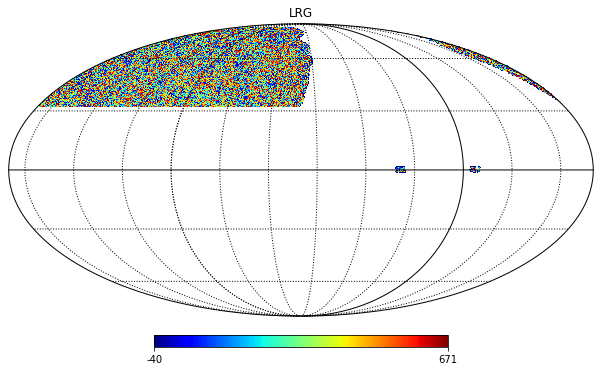

In [179]:
m_LRG = np.zeros(NPIX)

m_LRG[df_north.pixel_id.to_numpy()] = df_north.lrg.to_numpy()
mask = (m_LRG == 0)
m_LRG[mask] = np.nan
hp.mollview(m_LRG, title="LRG", format='%i', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

0.0 180.0 -180.0 180.0


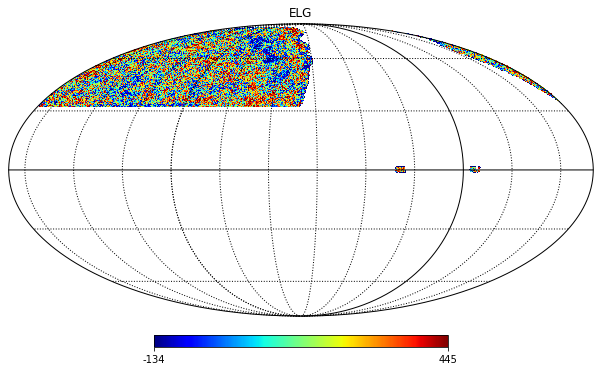

In [180]:
m_ELG = np.zeros(NPIX)

m_ELG[df_north.pixel_id.to_numpy()] = df_north.elg.to_numpy()
mask = (m_ELG == 0)
m_ELG[mask] = np.nan
hp.mollview(m_ELG, title="ELG", format='%i', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

0.0 180.0 -180.0 180.0


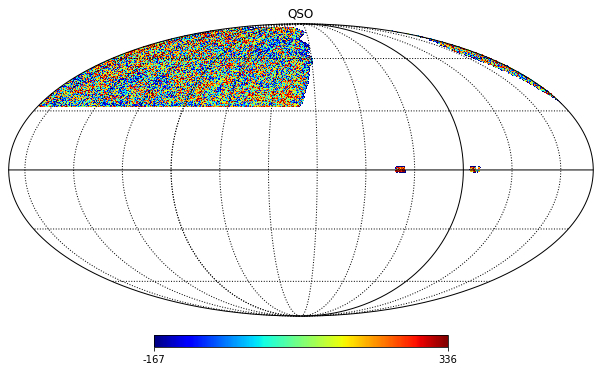

In [181]:
m_QSO = np.zeros(NPIX)

m_QSO[df_north.pixel_id.to_numpy()] = df_north.qso.to_numpy()
mask = (m_QSO == 0)
m_QSO[mask] = np.nan
hp.mollview(m_QSO, title="QSO", format='%i', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

In [182]:
# Getting Exposure Densities across pixels

with open('../../bricks_data/pixel2ccd_256.pickle', 'rb') as f:
    pixel2ccd_dict = pickle.load(f)
    f.close()

In [183]:
df_north = df_north.astype(int)
df_north.head()



pixel_id  lrg  elg  qso
0      1558    2    6    9
1      1560    1    7    8
2      1561    3    4    6
3      1562    1    5    6
4      1564    2    4   10

In [184]:
pix_ids = df_north.pixel_id.to_numpy()
exp_len = np.zeros(len(pix_ids))
print(pix_ids)
for i, pix in enumerate(pix_ids):
    exp_len[i] = len(pixel2ccd_dict[pix])

print(exp_len)

df_north['exposures'] = exp_len

df_north.head()

[  1558   1560   1561 ... 404975 404976 404979]
[ 10.  11.  10. ... 157. 128. 175.]


pixel_id  lrg  elg  qso  exposures
0      1558    2    6    9       10.0
1      1560    1    7    8       11.0
2      1561    3    4    6       10.0
3      1562    1    5    6       10.0
4      1564    2    4   10       10.0

In [185]:
df_north = df_north.astype(int)


0.0 180.0 -180.0 180.0


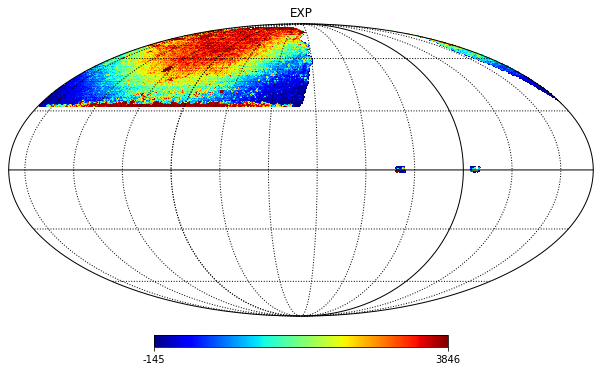

In [186]:
m_EXP = np.zeros(NPIX)

m_EXP[df_north.pixel_id.to_numpy()] = df_north.exposures.to_numpy()
mask = (m_EXP == 0)
m_EXP[mask] = np.nan
hp.mollview(m_EXP, title="EXP", format='%i', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()



### 4. Importing the Systematics Values and Appending them to the df.


#### a. Stellar Density

In [187]:
df_stellar = pd.read_csv('../../bricks_data/stellar_catalogue_north.csv')


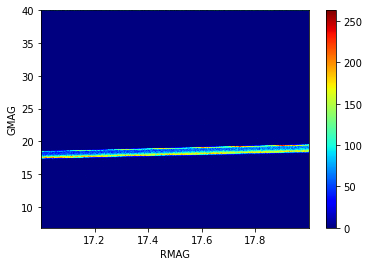

In [188]:
label_1 = 'RMAG'
label_2 = 'GMAG'

plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()

In [189]:
# REMOVING OUTLIERS
print(df_stellar.shape)

(3831097, 5)


In [190]:
df_stellar['GMR'] = df_stellar['GMAG'] - df_stellar['RMAG']
df_stellar['RMZ'] = df_stellar['RMAG'] - df_stellar['ZMAG']

In [191]:
df_stellar = df_stellar[(df_stellar['GMAG'] > 15) & (df_stellar['GMAG'] < 30)]
df_stellar = df_stellar[(df_stellar['ZMAG'] > 15) & (df_stellar['ZMAG'] < 30)]
df_stellar = df_stellar[(df_stellar['GMR'] > -2) & (df_stellar['GMR'] < 4)]
df_stellar = df_stellar[(df_stellar['RMZ'] > -2) & (df_stellar['RMZ'] < 4)]
print(df_stellar.shape)


(3464029, 7)


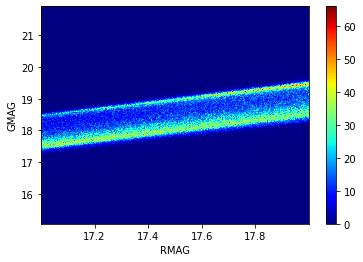

In [192]:
plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()


In [193]:
#Dividing RMAG Column into 1000 equally filled bins (assuming within the RMAG of 17-18 this is somewhat uniform)
df_stellar['percent_RMAG'] = pd.qcut(df_stellar['RMAG'], q=1000, labels=False)
df_stellar['percent_RMAG'].value_counts()


927    3478
963    3477
921    3477
407    3476
774    3476
       ... 
775    3453
704    3453
408    3452
349    3452
928    3450
Name: percent_RMAG, Length: 1000, dtype: int64

In [194]:
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_RMAG')
zscore = lambda x: abs((x - x.median()) / x.std())
df_stellar['Z_SCORE_RMZ'] = grouped['RMZ'].transform(zscore)
df_stellar['Z_SCORE_GMR'] = grouped['GMR'].transform(zscore)

In [195]:
#Dividing RMAG Column into 100 equally filled bins (assuming within the RMAG of 17-18 this is somewhat uniform)
df_stellar['percent_GMR'] = pd.qcut(df_stellar['GMR'], q=1000, labels=False)
df_stellar['percent_RMZ'] = pd.qcut(df_stellar['RMZ'], q=1000, labels=False)
df_stellar.shape

(3464029, 12)

In [196]:
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_GMR')
df_stellar['Z_SCORE_RMZ'] = grouped['RMZ'].transform(zscore)


In [197]:
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_RMZ')
df_stellar['Z_SCORE_GMR'] = grouped['GMR'].transform(zscore)

In [198]:
print(df_stellar.shape)
df_stellar = df_stellar[(df_stellar['Z_SCORE_GMR'] < 3)]
print(df_stellar.shape)
df_stellar = df_stellar[(df_stellar['Z_SCORE_RMZ'] < 3)]
df_stellar.shape

(3464029, 12)
(3436156, 12)


(3414224, 12)

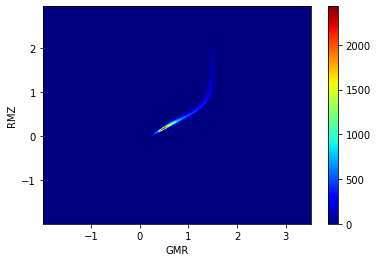

In [199]:
label_1 = 'GMR'
label_2 = 'RMZ'

plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()

In [200]:
ra_stellar = df_stellar["RA"].to_numpy(copy=True)
dec_stellar = df_stellar["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_stellar, dec_stellar)

print("Number of stellars in Sample:", len(ra_stellar))

stellar_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(stellar_pixel_indices, return_counts=True)

print(unique)

mean_stellar = counts.mean()
print("Mean stellars per Pixel:", mean_stellar)
# Calculating Densities for every block
density_stellar = (counts / mean_stellar) - 1
id_density = np.stack((unique, counts), axis=1)
print(id_density)
df_stellar = pd.DataFrame(id_density, columns=['pixel_id', 'stellar'])
df_stellar.pixel_id = df_stellar.pixel_id.astype(int)

print(df_stellar.head())

print(df_stellar.isna().sum())

Number of stellars in Sample: 3414224
[  1560   1561   1562 ... 404978 404979 404981]
Mean stellars per Pixel: 34.1514608944415
[[  1560      1]
 [  1561      3]
 [  1562      2]
 ...
 [404978      1]
 [404979      2]
 [404981      1]]
   pixel_id  stellar
0      1560        1
1      1561        3
2      1562        2
3      1564        1
4      1565        3
pixel_id    0
stellar     0
dtype: int64


In [201]:
df_north = df_north.merge(df_stellar, how='inner', on='pixel_id')
print(df_north.isna().sum())
df_north.shape

pixel_id     0
lrg          0
elg          0
qso          0
exposures    0
stellar      0
dtype: int64


(99798, 6)

In [202]:
df_north.head()

pixel_id  lrg  elg  qso  exposures  stellar
0      1560    1    7    8         11        1
1      1561    3    4    6         10        3
2      1562    1    5    6         10        2
3      1564    2    4   10         10        1
4      1565    2   11    7          9        3

0.0 180.0 -180.0 180.0


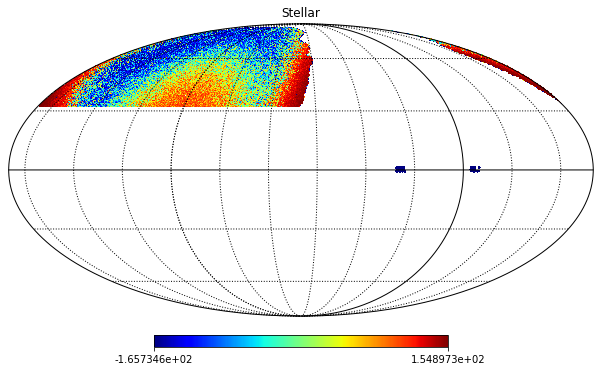

In [203]:
m_Stellar = np.zeros(NPIX)

m_Stellar[df_north.pixel_id.to_numpy()] = df_north.stellar.to_numpy()
mask = (m_Stellar == 0)
m_Stellar[mask] = np.nan
hp.mollview(m_Stellar, title="Stellar", format='%e', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0),
            badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()

#### EBV Extraction

In [204]:
from astropy.coordinates import SkyCoord, Latitude, Longitude
from dustmaps.sfd import SFDQuery

In [205]:
from dustmaps.config import config

config['data_dir'] = '/Users/edgareggert/astrostatistics/data_preprocessing/.dustmapsrc'

In [206]:
## Getting the centers of each pixel in my corpus as RaDec

pixels_ids = df_north["pixel_id"].to_numpy()
print(pixels_ids)
subpixel_coords = hp.pix2ang(NSIDE, pixels_ids, lonlat=True)
ra_ebv = subpixel_coords[0]
dec_ebv = subpixel_coords[1]

[  1560   1561   1562 ... 404975 404976 404979]


In [207]:
#Querying their position on the SFD dustmap
sfd = SFDQuery()
coords = SkyCoord(ra_ebv, dec_ebv, frame='icrs', unit='deg')
ebv = sfd(coords)

df_north["EBV"] = ebv

In [208]:
df_north.EBV.describe()
df_north.head()


pixel_id  lrg  elg  qso  exposures  stellar       EBV
0      1560    1    7    8         11        1  0.157148
1      1561    3    4    6         10        3  0.277929
2      1562    1    5    6         10        2  0.255054
3      1564    2    4   10         10        1  0.208612
4      1565    2   11    7          9        3  0.247232

0.0 180.0 -180.0 180.0


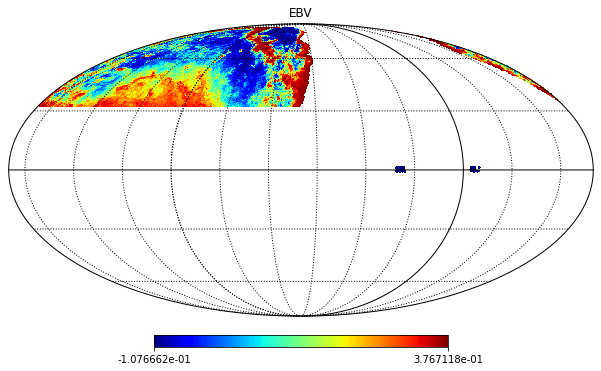

In [209]:
m_EBV = np.zeros(NPIX)

m_EBV[df_north.pixel_id.to_numpy()] = df_north.EBV.to_numpy()
mask = (m_EBV == 0)
m_EBV[mask] = np.nan
hp.mollview(m_EBV, title="EBV", format='%e', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

In [210]:
df_north.exposures = df_north.exposures.astype(int)
df_north.head()


pixel_id  lrg  elg  qso  exposures  stellar       EBV
0      1560    1    7    8         11        1  0.157148
1      1561    3    4    6         10        3  0.277929
2      1562    1    5    6         10        2  0.255054
3      1564    2    4   10         10        1  0.208612
4      1565    2   11    7          9        3  0.247232

In [211]:
with open('../../bricks_data/pixel2systematics_geometric_non_inclusive.pickle', 'rb') as f:
    geo_dict = pickle.load(f)
    f.close()

print(len(geo_dict.keys()))

446042


In [212]:
sys_list = []
for key in geo_dict.keys():
    ind_sys_list = geo_dict[key]
    ind_sys_list.append(key)
    sys_list.append(ind_sys_list)

df_sys_geo_no = pd.DataFrame(sys_list, columns=['airmass',
                                                'ccdskysb_g',
                                                'ccdskysb_r',
                                                'ccdskysb_z',
                                                'exptime_g',
                                                'exptime_r',
                                                'exptime_z',
                                                'meansky_g',
                                                'meansky_r',
                                                'meansky_z',
                                                'galdepth_g',
                                                'galdepth_r',
                                                'galdepth_z',
                                                'seeing_g',
                                                'seeing_r',
                                                'seeing_z',
                                                'psfdepth_g',
                                                'psfdepth_r',
                                                'psfdepth_z',
                                                'psfnorm_mean_g',
                                                'psfnorm_mean_r',
                                                'psfnorm_mean_z',
                                                'gausspsfdepth_g',
                                                'gausspsfdepth_r',
                                                'gausspsfdepth_z',
                                                'pixel_covered',
                                                'pixel_id'])



In [213]:
print(len((df_sys_geo_no)))

446042


In [214]:
df_north = df_north.merge(df_sys_geo_no, how='inner', on='pixel_id')
print(len(df_north))
print(len(df_north))

99693
99693


In [215]:
print(df_north.isna().sum())

pixel_id            0
lrg                 0
elg                 0
qso                 0
exposures           0
stellar             0
EBV                 0
airmass             0
ccdskysb_g         30
ccdskysb_r          0
ccdskysb_z          1
exptime_g           0
exptime_r           0
exptime_z           0
meansky_g           0
meansky_r           0
meansky_z           0
galdepth_g          0
galdepth_r          0
galdepth_z          0
seeing_g            0
seeing_r            0
seeing_z            0
psfdepth_g          0
psfdepth_r          0
psfdepth_z          0
psfnorm_mean_g      0
psfnorm_mean_r      0
psfnorm_mean_z      0
gausspsfdepth_g     0
gausspsfdepth_r     0
gausspsfdepth_z     0
pixel_covered       0
dtype: int64


In [216]:
df_north.dropna(axis=0, inplace=True)
print(df_north.isna().sum())

pixel_id           0
lrg                0
elg                0
qso                0
exposures          0
stellar            0
EBV                0
airmass            0
ccdskysb_g         0
ccdskysb_r         0
ccdskysb_z         0
exptime_g          0
exptime_r          0
exptime_z          0
meansky_g          0
meansky_r          0
meansky_z          0
galdepth_g         0
galdepth_r         0
galdepth_z         0
seeing_g           0
seeing_r           0
seeing_z           0
psfdepth_g         0
psfdepth_r         0
psfdepth_z         0
psfnorm_mean_g     0
psfnorm_mean_r     0
psfnorm_mean_z     0
gausspsfdepth_g    0
gausspsfdepth_r    0
gausspsfdepth_z    0
pixel_covered      0
dtype: int64


In [217]:
print(df_north.describe())

            pixel_id           lrg           elg           qso     exposures  \
count   99662.000000  99662.000000  99662.000000  99662.000000  99662.000000   
mean    94717.378469     35.493859    124.771086    152.997692     43.975999   
std     58358.652988     13.870803     23.162993     29.519543     81.547286   
min      1667.000000      1.000000      1.000000      1.000000      5.000000   
25%     47504.250000     27.000000    111.000000    134.000000     32.000000   
50%     91700.500000     34.000000    124.000000    152.000000     36.000000   
75%    138432.750000     41.000000    139.000000    171.000000     41.000000   
max    404979.000000    708.000000    703.000000    471.000000   4145.000000   

            stellar           EBV       airmass    ccdskysb_g    ccdskysb_r  \
count  99662.000000  99662.000000  99662.000000  99662.000000  99662.000000   
mean      34.171189      0.035287      1.216792     23.383511     22.578218   
std       31.451833      0.031403      0.1

In [218]:
cols = list(df_north.columns)
cols.remove('pixel_id')


In [219]:
df_north.head()

pixel_id  lrg  elg  qso  exposures  stellar       EBV   airmass  \
0      1667   10   31   48         14        5  0.060365  1.686962   
1      1668    7   30   43         14        7  0.071565  1.692857   
2      1669    9   38   44         15        6  0.065674  1.691899   
3      1670    8   45   53         12       10  0.076584  1.699775   
4      1671    9   40   54         13       16  0.114809  1.721909   

   ccdskysb_g  ccdskysb_r  ...  psfdepth_g  psfdepth_r  psfdepth_z  \
0   23.600771   21.159200  ...   23.830227   22.268559   22.429981   
1   23.556622   21.281648  ...   23.785484   22.196788   22.369873   
2   23.558167   21.281731  ...   23.857937   22.182335   22.571241   
3   23.498325   21.441406  ...   23.983856   22.338346   22.524883   
4   23.496811   21.440643  ...   24.072981   22.318738   22.630867   

   psfnorm_mean_g  psfnorm_mean_r  psfnorm_mean_z  gausspsfdepth_g  \
0        0.145224        0.137983        0.138423        24.013548   
1        0.151245        0.139262        0.136332        23.949081   
2        0.148223        0.134278        0.135896        24.037708   
3        0.172615        0.135743        0.134056        24.151823   
4        0.167368        0.132003        0.140934        24.254847   

   gausspsfdepth_r  gausspsfdepth_z  pixel_covered  
0        22.542369        22.598709       0.765625  
1        22.452972        22.572845       0.750000  
2        22.431852        22.746758       0.765625  
3        22.640640        22.679184       0.765625  
4        22.600306        22.837112       0.750000  

[5 rows x 33 columns]

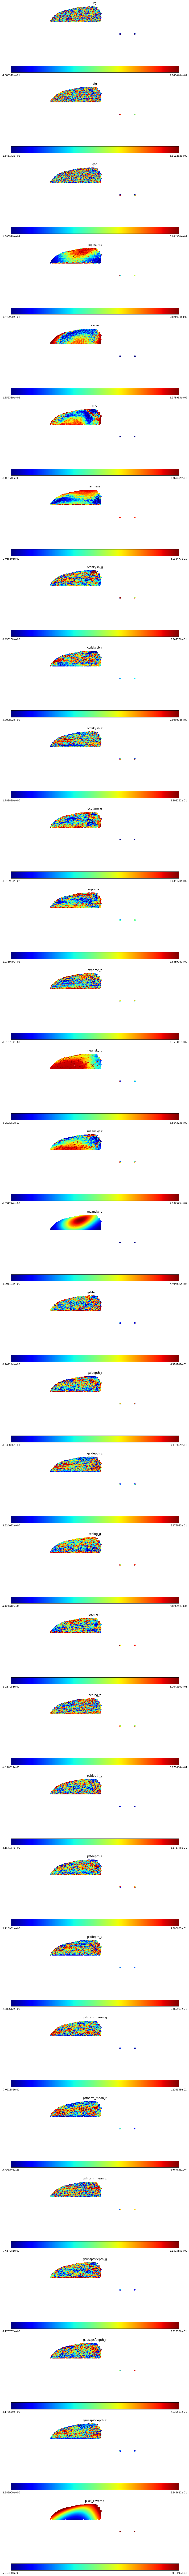

In [220]:
nrows = 32
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(200, 200))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = cols[i]

    m = np.zeros(NPIX)

    m[df_north.pixel_id.to_numpy()] = df_north[elem].to_numpy()
    mask = (m == 0)
    m[mask] = np.nan
    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1),format='%e', norm='hist', cmap="jet", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()



In [221]:
df_north.describe()

pixel_id           lrg           elg           qso     exposures  \
count   99662.000000  99662.000000  99662.000000  99662.000000  99662.000000   
mean    94717.378469     35.493859    124.771086    152.997692     43.975999   
std     58358.652988     13.870803     23.162993     29.519543     81.547286   
min      1667.000000      1.000000      1.000000      1.000000      5.000000   
25%     47504.250000     27.000000    111.000000    134.000000     32.000000   
50%     91700.500000     34.000000    124.000000    152.000000     36.000000   
75%    138432.750000     41.000000    139.000000    171.000000     41.000000   
max    404979.000000    708.000000    703.000000    471.000000   4145.000000   

            stellar           EBV       airmass    ccdskysb_g    ccdskysb_r  \
count  99662.000000  99662.000000  99662.000000  99662.000000  99662.000000   
mean      34.171189      0.035287      1.216792     23.383511     22.578218   
std       31.451833      0.031403      0.196178      0.206255      0.299810   
min        1.000000      0.002823      1.000179     19.810131     19.743704   
25%       15.000000      0.014674      1.055321     23.307539     22.423604   
50%       22.000000      0.023096      1.153695     23.418670     22.627118   
75%       41.000000      0.045453      1.316486     23.514771     22.780234   
max      664.000000      0.431732      2.132062     23.829928     25.279337   

       ...    psfdepth_g    psfdepth_r    psfdepth_z  psfnorm_mean_g  \
count  ...  99662.000000  99662.000000  99662.000000    99662.000000   
mean   ...     23.641866     23.019976     22.567059        0.157880   
std    ...      0.212061      0.240630      0.267901        0.019418   
min    ...     20.088421     18.947199      0.000000        0.077112   
25%    ...     23.570854     22.939775     22.474605        0.144526   
50%    ...     23.658188     23.065406     22.619300        0.157924   
75%    ...     23.750104     23.157356     22.726440        0.170658   
max    ...     24.318750     23.826775     23.347145        0.285245   

       psfnorm_mean_r  psfnorm_mean_z  gausspsfdepth_g  gausspsfdepth_r  \
count    99662.000000    99662.000000     99662.000000     99662.000000   
mean         0.178107        0.137536        23.829691        23.189176   
std          0.024557        0.022794         0.223880         0.239627   
min          0.094105        0.000000        19.363297        19.028231   
25%          0.160623        0.126237        23.758925        23.111324   
50%          0.177725        0.136982        23.848361        23.226860   
75%          0.194895        0.148283        23.943942        23.324144   
max          0.276389        3.160772        24.483849        23.986845   

       gausspsfdepth_z  pixel_covered  
count     99662.000000   99662.000000  
mean         22.764928       0.999827  
std           0.274575       0.005254  
min           0.000000       0.750000  
25%          22.670864       1.000000  
50%          22.821491       1.000000  
75%          22.927848       1.000000  
max          23.560917       1.000000  

[8 rows x 33 columns]

# South

In [222]:
df_south = pd.read_csv('../../bricks_data/galaxy_catalogue_south.csv',
                       dtype={'BrickID': 'int32', 'LRG': 'int8', 'ELG': 'int8', 'QSO': 'int8'})


In [223]:
print(df_south.shape)
duplicates_removed = df_south.drop_duplicates()

print(duplicates_removed.shape)

(89107555, 6)
(89103806, 6)


In [224]:
df_south = duplicates_removed

print(len(df_south.BrickID.unique()))

248966


In [225]:
print(df_south.isna().sum())

BrickID         0
RA         146878
DEC        146878
LRG             0
ELG             0
QSO             0
dtype: int64


In [226]:
# Removing all Lines with Nan that were added to ensure that all bricks are stored
df_south = df_south.dropna(axis=0, inplace=False, how='any')

print(len(df_south.BrickID.unique()))
print(len(df_south))

242948
88956928


In [227]:
df_south.head()

BrickID          RA       DEC  LRG  ELG  QSO
0   387694  350.870568  9.868695    1    0    0
1   387694  350.871680  9.637755    0    1    0
2   387694  350.872142  9.694869    0    0    1
3   387694  350.872631  9.724626    0    0    1
4   387694  350.873243  9.683394    0    1    0

### 2. Get Galaxy Count per Healpy Pixel


In [228]:
# LRG

df_LRG = df_south[df_south["LRG"] == 1]
ra_LRG = df_LRG["RA"].to_numpy(copy=True)
dec_LRG = df_LRG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_LRG, dec_LRG)

print("Number of LRGs in Sample:", len(ra_LRG))

LRG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(LRG_pixel_indices, return_counts=True)

print(unique)

mean_LRG = counts.mean()
print("Mean LRGs per Pixel:", mean_LRG)
# Calculating Densities for every block

#density_LRG = (counts / mean_LRG) - 1
id_density = np.stack((unique, counts), axis=1)
#print(id_density)
df_lrg = pd.DataFrame(id_density, columns=['pixel_id', 'lrg'])
df_lrg.pixel_id = df_lrg.pixel_id.astype(int)
df_lrg.head()

Number of LRGs in Sample: 9688822
[163021 163022 163023 ... 757955 758427 758428]
Mean LRGs per Pixel: 33.539958597866196


pixel_id  lrg
0    163021    3
1    163022    1
2    163023    5
3    163024    3
4    164044    3

In [229]:
# elg

df_ELG = df_south[df_south["ELG"] == 1]
ra_ELG = df_ELG["RA"].to_numpy(copy=True)
dec_ELG = df_ELG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_ELG, dec_ELG)

print("Number of ELGs in Sample:", len(ra_ELG))

ELG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(ELG_pixel_indices, return_counts=True)

print(unique)

mean_ELG = counts.mean()
print("Mean ELGs per Pixel:", mean_ELG)
# Calculating Densities for every block
#density_ELG = (counts / mean_ELG) - 1
id_density = np.stack((unique, counts), axis=1)
print(id_density)
df_elg = pd.DataFrame(id_density, columns=['pixel_id', 'elg'])
df_elg.pixel_id = df_elg.pixel_id.astype(int)

print(df_elg.head())

Number of ELGs in Sample: 36977945
[163021 163022 163023 ... 758428 758429 758430]
Mean ELGs per Pixel: 127.80366289478596
[[163021     14]
 [163022     17]
 [163023     20]
 ...
 [758428     12]
 [758429      4]
 [758430      6]]
   pixel_id  elg
0    163021   14
1    163022   17
2    163023   20
3    163024   23
4    163025    8


In [230]:
df_QSO = df_south[df_south["QSO"] == 1]
ra_QSO = df_QSO["RA"].to_numpy(copy=True)
dec_QSO = df_QSO["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_QSO, dec_QSO)

print("Number of QSOs in Sample:", len(ra_QSO))

QSO_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(QSO_pixel_indices, return_counts=True)

print(unique)

mean_QSO = counts.mean()
print("Mean QSOs per Pixel:", mean_QSO)
# Calculating Densities for every block
#density_QSO = (counts / mean_QSO) - 1
id_density = np.stack((unique, counts), axis=1)
print(id_density)
df_qso = pd.DataFrame(id_density, columns=['pixel_id', 'qso'])
df_qso.pixel_id = df_qso.pixel_id.astype(int)

print(df_qso.head())

Number of QSOs in Sample: 46639681
[163021 163022 163023 ... 758428 758429 758430]
Mean QSOs per Pixel: 161.19278291013026
[[163021     18]
 [163022     18]
 [163023     23]
 ...
 [758428      6]
 [758429      6]
 [758430      4]]
   pixel_id  qso
0    163021   18
1    163022   18
2    163023   23
3    163024   23
4    163025   11


In [231]:
df_south = pd.merge(df_lrg, df_elg, how='outer', on='pixel_id')
df_south = pd.merge(df_south, df_qso, how='outer', on='pixel_id')
print(df_south.isna().sum())
print(df_lrg.shape, df_elg.shape, df_qso.shape, df_south.shape)

pixel_id      0
lrg         590
elg         130
qso         123
dtype: int64
(288874, 2) (289334, 2) (289341, 2) (289464, 4)


In [232]:
# Dropping all pixels where I do not have counts for all 3 types of galaxies
df_south.dropna(axis=0, inplace=True)
print(df_south.isna().sum())
print(df_south.shape)

pixel_id    0
lrg         0
elg         0
qso         0
dtype: int64
(288816, 4)


### 3. Plotting Galaxy Densities

0.0 180.0 -180.0 180.0


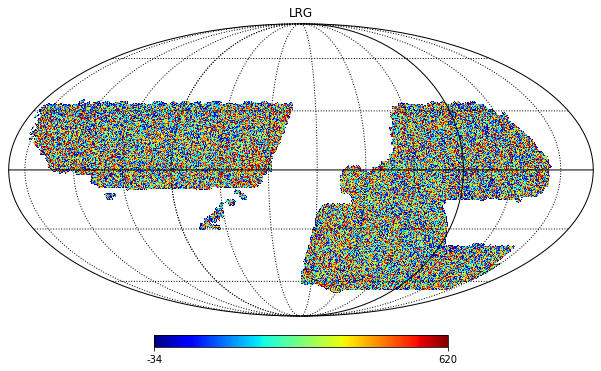

In [233]:
m_LRG = np.zeros(NPIX)

m_LRG[df_south.pixel_id.to_numpy()] = df_south.lrg.to_numpy()
mask = (m_LRG == 0)
m_LRG[mask] = np.nan
hp.mollview(m_LRG, title="LRG", format='%i', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

0.0 180.0 -180.0 180.0


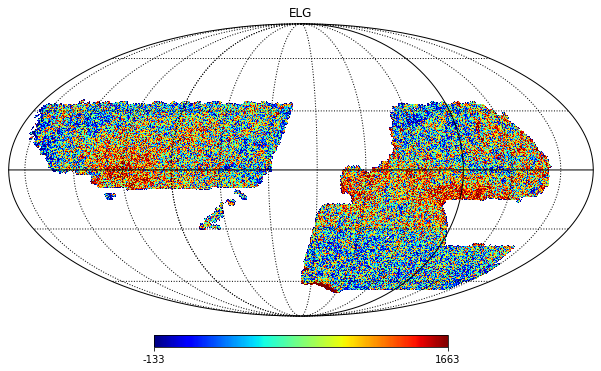

In [234]:
m_ELG = np.zeros(NPIX)

m_ELG[df_south.pixel_id.to_numpy()] = df_south.elg.to_numpy()
mask = (m_ELG == 0)
m_ELG[mask] = np.nan
hp.mollview(m_ELG, title="ELG", format='%i', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

0.0 180.0 -180.0 180.0


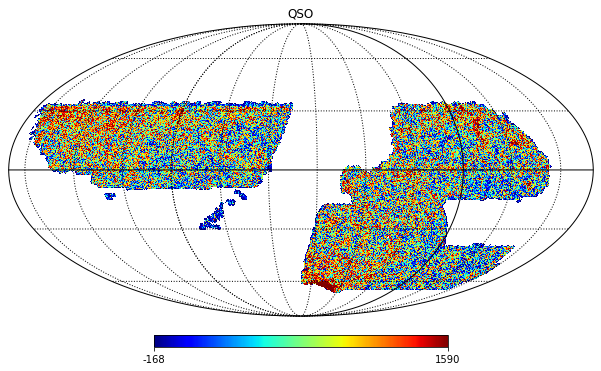

In [235]:
m_QSO = np.zeros(NPIX)

m_QSO[df_south.pixel_id.to_numpy()] = df_south.qso.to_numpy()
mask = (m_QSO == 0)
m_QSO[mask] = np.nan
hp.mollview(m_QSO, title="QSO", format='%i', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

In [236]:
# Getting Exposure Densities across pixels

with open('../../bricks_data/pixel2ccd_256.pickle', 'rb') as f:
    pixel2ccd_dict = pickle.load(f)
    f.close()

In [237]:
df_south = df_south.astype(int)
df_south.head()



pixel_id  lrg  elg  qso
0    163021    3   14   18
1    163022    1   17   18
2    163023    5   20   23
3    163024    3   23   23
4    164044    3   48   47

In [238]:
pix_ids = df_south.pixel_id.to_numpy()
exp_len = np.zeros(len(pix_ids))
print(pix_ids)
for i, pix in enumerate(pix_ids):
    exp_len[i] = len(pixel2ccd_dict[pix])

print(exp_len)

df_south['exposures'] = exp_len

df_south.head()

[163021 163022 163023 ... 757955 758427 758428]
[43. 47. 43. ...  8.  6.  9.]


pixel_id  lrg  elg  qso  exposures
0    163021    3   14   18       43.0
1    163022    1   17   18       47.0
2    163023    5   20   23       43.0
3    163024    3   23   23       49.0
4    164044    3   48   47       51.0

In [239]:
df_south = df_south.astype(int)


0.0 180.0 -180.0 180.0


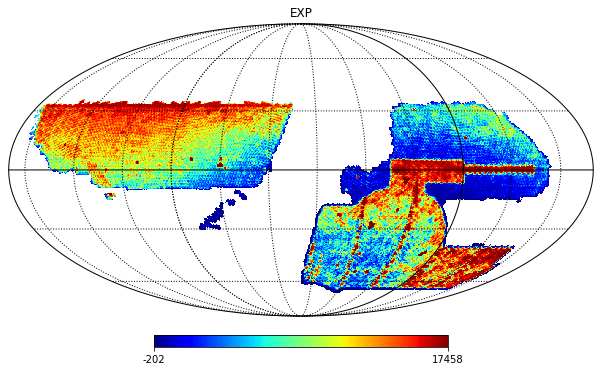

In [240]:
m_EXP = np.zeros(NPIX)

m_EXP[df_south.pixel_id.to_numpy()] = df_south.exposures.to_numpy()
mask = (m_EXP == 0)
m_EXP[mask] = np.nan
hp.mollview(m_EXP, title="EXP", format='%i', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()



### 4. Importing the Systematics Values and Appending them to the df.


#### a. Stellar Density

In [241]:
df_stellar = pd.read_csv('../../bricks_data/stellar_catalogue_south.csv')


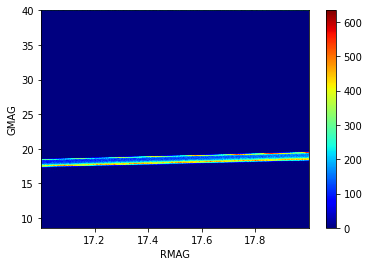

In [242]:
label_1 = 'RMAG'
label_2 = 'GMAG'

plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()

In [243]:
# REMOVING OUTLIERS
print(df_stellar.shape)

(9603616, 5)


In [244]:
df_stellar['GMR'] = df_stellar['GMAG'] - df_stellar['RMAG']
df_stellar['RMZ'] = df_stellar['RMAG'] - df_stellar['ZMAG']

In [245]:
df_stellar = df_stellar[(df_stellar['GMAG'] > 15) & (df_stellar['GMAG'] < 30)]
df_stellar = df_stellar[(df_stellar['ZMAG'] > 15) & (df_stellar['ZMAG'] < 30)]
df_stellar = df_stellar[(df_stellar['GMR'] > -2) & (df_stellar['GMR'] < 4)]
df_stellar = df_stellar[(df_stellar['RMZ'] > -2) & (df_stellar['RMZ'] < 4)]
print(df_stellar.shape)


(9349506, 7)


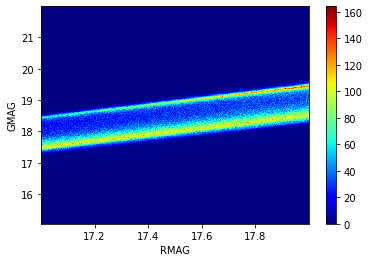

In [246]:
plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()


In [247]:
#Dividing RMAG Column into 1000 equally filled bins (assuming within the RMAG of 17-18 this is somewhat uniform)
df_stellar['percent_RMAG'] = pd.qcut(df_stellar['RMAG'], q=1000, labels=False)
df_stellar['percent_RMAG'].value_counts()


434    9382
506    9380
524    9377
593    9376
892    9374
       ... 
809    9324
594    9321
507    9320
435    9318
885    9313
Name: percent_RMAG, Length: 1000, dtype: int64

In [248]:
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_RMAG')
zscore = lambda x: abs((x - x.median()) / x.std())
df_stellar['Z_SCORE_RMZ'] = grouped['RMZ'].transform(zscore)
df_stellar['Z_SCORE_GMR'] = grouped['GMR'].transform(zscore)

In [249]:
#Dividing RMAG Column into 100 equally filled bins (assuming within the RMAG of 17-18 this is somewhat uniform)
df_stellar['percent_GMR'] = pd.qcut(df_stellar['GMR'], q=1000, labels=False)
df_stellar['percent_RMZ'] = pd.qcut(df_stellar['RMZ'], q=1000, labels=False)
df_stellar.shape

(9349506, 12)

In [250]:
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_GMR')
df_stellar['Z_SCORE_RMZ'] = grouped['RMZ'].transform(zscore)


In [251]:
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_RMZ')
df_stellar['Z_SCORE_GMR'] = grouped['GMR'].transform(zscore)

In [252]:
print(df_stellar.shape)
df_stellar = df_stellar[(df_stellar['Z_SCORE_GMR'] < 3)]
print(df_stellar.shape)
df_stellar = df_stellar[(df_stellar['Z_SCORE_RMZ'] < 3)]
df_stellar.shape

(9349506, 12)
(9282180, 12)


(9245319, 12)

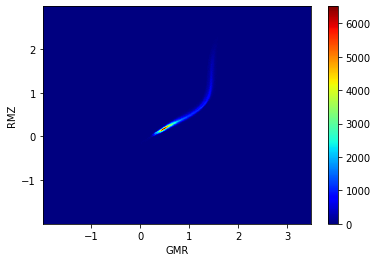

In [253]:
label_1 = 'GMR'
label_2 = 'RMZ'

plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()

In [254]:
ra_stellar = df_stellar["RA"].to_numpy(copy=True)
dec_stellar = df_stellar["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_stellar, dec_stellar)

print("Number of stellars in Sample:", len(ra_stellar))

stellar_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(stellar_pixel_indices, return_counts=True)

print(unique)

mean_stellar = counts.mean()
print("Mean stellars per Pixel:", mean_stellar)
# Calculating Densities for every block
density_stellar = (counts / mean_stellar) - 1
id_density = np.stack((unique, counts), axis=1)
print(id_density)
df_stellar = pd.DataFrame(id_density, columns=['pixel_id', 'stellar'])
df_stellar.pixel_id = df_stellar.pixel_id.astype(int)

print(df_stellar.head())

print(df_stellar.isna().sum())

Number of stellars in Sample: 9245319
[163021 163022 163023 ... 757955 758426 758427]
Mean stellars per Pixel: 31.99083387831792
[[163021      3]
 [163022      6]
 [163023      3]
 ...
 [757955      4]
 [758426      2]
 [758427      2]]
   pixel_id  stellar
0    163021        3
1    163022        6
2    163023        3
3    163024        2
4    163025        6
pixel_id    0
stellar     0
dtype: int64


In [255]:
df_south = df_south.merge(df_stellar, how='inner', on='pixel_id')
print(df_south.isna().sum())
df_south.shape

pixel_id     0
lrg          0
elg          0
qso          0
exposures    0
stellar      0
dtype: int64


(288643, 6)

In [256]:
df_south.head()

pixel_id  lrg  elg  qso  exposures  stellar
0    163021    3   14   18         43        3
1    163022    1   17   18         47        6
2    163023    5   20   23         43        3
3    163024    3   23   23         49        2
4    164044    3   48   47         51       10

0.0 180.0 -180.0 180.0


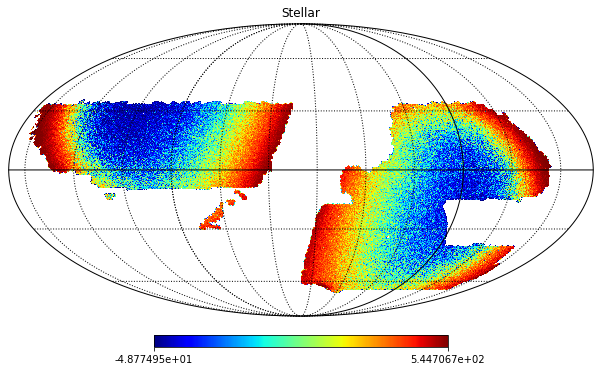

In [257]:
m_Stellar = np.zeros(NPIX)

m_Stellar[df_south.pixel_id.to_numpy()] = df_south.stellar.to_numpy()
mask = (m_Stellar == 0)
m_Stellar[mask] = np.nan
hp.mollview(m_Stellar, title="Stellar", format='%e', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0),
            badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()

#### EBV Extraction

In [258]:
from astropy.coordinates import SkyCoord, Latitude, Longitude
from dustmaps.sfd import SFDQuery

In [259]:
from dustmaps.config import config

config['data_dir'] = '/Users/edgareggert/astrostatistics/data_preprocessing/.dustmapsrc'

In [260]:
## Getting the centers of each pixel in my corpus as RaDec

pixels_ids = df_south["pixel_id"].to_numpy()
print(pixels_ids)
subpixel_coords = hp.pix2ang(NSIDE, pixels_ids, lonlat=True)
ra_ebv = subpixel_coords[0]
dec_ebv = subpixel_coords[1]

[163021 163022 163023 ... 757954 757955 758427]


In [261]:
#Querying their position on the SFD dustmap
sfd = SFDQuery()
coords = SkyCoord(ra_ebv, dec_ebv, frame='icrs', unit='deg')
ebv = sfd(coords)

df_south["EBV"] = ebv

In [262]:
df_south.EBV.describe()
df_south.head()


pixel_id  lrg  elg  qso  exposures  stellar       EBV
0    163021    3   14   18         43        3  0.018336
1    163022    1   17   18         47        6  0.016466
2    163023    5   20   23         43        3  0.016983
3    163024    3   23   23         49        2  0.013889
4    164044    3   48   47         51       10  0.019769

0.0 180.0 -180.0 180.0


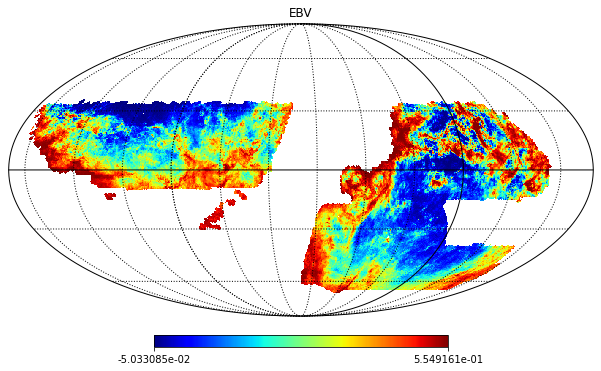

In [263]:
m_EBV = np.zeros(NPIX)

m_EBV[df_south.pixel_id.to_numpy()] = df_south.EBV.to_numpy()
mask = (m_EBV == 0)
m_EBV[mask] = np.nan
hp.mollview(m_EBV, title="EBV", format='%e', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

In [264]:
df_south.exposures = df_south.exposures.astype(int)
df_south.head()


pixel_id  lrg  elg  qso  exposures  stellar       EBV
0    163021    3   14   18         43        3  0.018336
1    163022    1   17   18         47        6  0.016466
2    163023    5   20   23         43        3  0.016983
3    163024    3   23   23         49        2  0.013889
4    164044    3   48   47         51       10  0.019769

In [265]:
with open('../../bricks_data/pixel2systematics_geometric_non_inclusive.pickle', 'rb') as f:
    geo_dict = pickle.load(f)
    f.close()

print(len(geo_dict.keys()))

446042


In [266]:
sys_list = []
for key in geo_dict.keys():
    ind_sys_list = geo_dict[key]
    ind_sys_list.append(key)
    sys_list.append(ind_sys_list)

df_sys_geo_no = pd.DataFrame(sys_list, columns=['airmass',
                                                'ccdskysb_g',
                                                'ccdskysb_r',
                                                'ccdskysb_z',
                                                'exptime_g',
                                                'exptime_r',
                                                'exptime_z',
                                                'meansky_g',
                                                'meansky_r',
                                                'meansky_z',
                                                'galdepth_g',
                                                'galdepth_r',
                                                'galdepth_z',
                                                'seeing_g',
                                                'seeing_r',
                                                'seeing_z',
                                                'psfdepth_g',
                                                'psfdepth_r',
                                                'psfdepth_z',
                                                'psfnorm_mean_g',
                                                'psfnorm_mean_r',
                                                'psfnorm_mean_z',
                                                'gausspsfdepth_g',
                                                'gausspsfdepth_r',
                                                'gausspsfdepth_z',
                                                'pixel_covered',
                                                'pixel_id'])



In [267]:
print(len((df_sys_geo_no)))

446042


In [268]:
df_south = df_south.merge(df_sys_geo_no, how='inner', on='pixel_id')
print(len(df_south))
print(len(df_south))

287126
287126


In [269]:
print(df_south.isna().sum())

pixel_id            0
lrg                 0
elg                 0
qso                 0
exposures           0
stellar             0
EBV                 0
airmass             0
ccdskysb_g         22
ccdskysb_r         33
ccdskysb_z          3
exptime_g           0
exptime_r           0
exptime_z           0
meansky_g           0
meansky_r           0
meansky_z           0
galdepth_g          0
galdepth_r          0
galdepth_z          0
seeing_g            0
seeing_r            0
seeing_z            0
psfdepth_g          0
psfdepth_r          0
psfdepth_z          0
psfnorm_mean_g      0
psfnorm_mean_r      0
psfnorm_mean_z      0
gausspsfdepth_g     0
gausspsfdepth_r     0
gausspsfdepth_z     0
pixel_covered       0
dtype: int64


In [270]:
df_south.dropna(axis=0, inplace=True)
print(df_south.isna().sum())

pixel_id           0
lrg                0
elg                0
qso                0
exposures          0
stellar            0
EBV                0
airmass            0
ccdskysb_g         0
ccdskysb_r         0
ccdskysb_z         0
exptime_g          0
exptime_r          0
exptime_z          0
meansky_g          0
meansky_r          0
meansky_z          0
galdepth_g         0
galdepth_r         0
galdepth_z         0
seeing_g           0
seeing_r           0
seeing_z           0
psfdepth_g         0
psfdepth_r         0
psfdepth_z         0
psfnorm_mean_g     0
psfnorm_mean_r     0
psfnorm_mean_z     0
gausspsfdepth_g    0
gausspsfdepth_r    0
gausspsfdepth_z    0
pixel_covered      0
dtype: int64


In [271]:
print(df_south.describe())

            pixel_id            lrg            elg            qso  \
count  287075.000000  287075.000000  287075.000000  287075.000000   
mean   418110.429599      33.668449     128.415292     162.053136   
std    166764.257458      13.200295      28.050569      35.216174   
min    163021.000000       1.000000       1.000000       1.000000   
25%    280486.500000      26.000000     114.000000     145.000000   
50%    387595.000000      32.000000     128.000000     161.000000   
75%    549476.500000      39.000000     142.000000     178.000000   
max    757954.000000     676.000000    2936.000000    2040.000000   

           exposures        stellar            EBV        airmass  \
count  287075.000000  287075.000000  287075.000000  287075.000000   
mean      120.363644      32.070253       0.044123       1.407593   
std       280.577425      27.666434       0.032741       0.253899   
min         6.000000       1.000000       0.000583       1.004748   
25%        64.000000      15.0000

In [272]:
cols = list(df_south.columns)
cols.remove('pixel_id')


In [273]:
df_south.head()

pixel_id  lrg  elg  qso  exposures  stellar       EBV   airmass  \
0    163021    3   14   18         43        3  0.018336  1.075628   
1    163022    1   17   18         47        6  0.016466  1.066675   
2    163023    5   20   23         43        3  0.016983  1.099756   
3    163024    3   23   23         49        2  0.013889  1.141582   
4    164044    3   48   47         51       10  0.019769  1.102826   

   ccdskysb_g  ccdskysb_r  ...  psfdepth_g  psfdepth_r  psfdepth_z  \
0   23.387338   22.355397  ...   23.568120   22.986782   22.824048   
1   23.351178   22.468524  ...   23.608917   22.894046   22.702037   
2   23.351565   22.440314  ...   23.571177   22.948443   22.605821   
3   23.351568   22.439641  ...   23.584905   22.976249   22.611627   
4   23.404226   22.423180  ...   23.539988   23.062602   22.837433   

   psfnorm_mean_g  psfnorm_mean_r  psfnorm_mean_z  gausspsfdepth_g  \
0        0.129023        0.170075        0.160323        23.708823   
1        0.132527        0.151160        0.131321        23.737227   
2        0.135617        0.149136        0.133771        23.754176   
3        0.136474        0.152069        0.128006        23.745989   
4        0.125407        0.171540        0.155293        23.676763   

   gausspsfdepth_r  gausspsfdepth_z  pixel_covered  
0        23.194896        23.034398            1.0  
1        23.114644        22.908310            1.0  
2        23.141859        22.804123            1.0  
3        23.176429        22.803207            1.0  
4        23.244722        23.056524            1.0  

[5 rows x 33 columns]

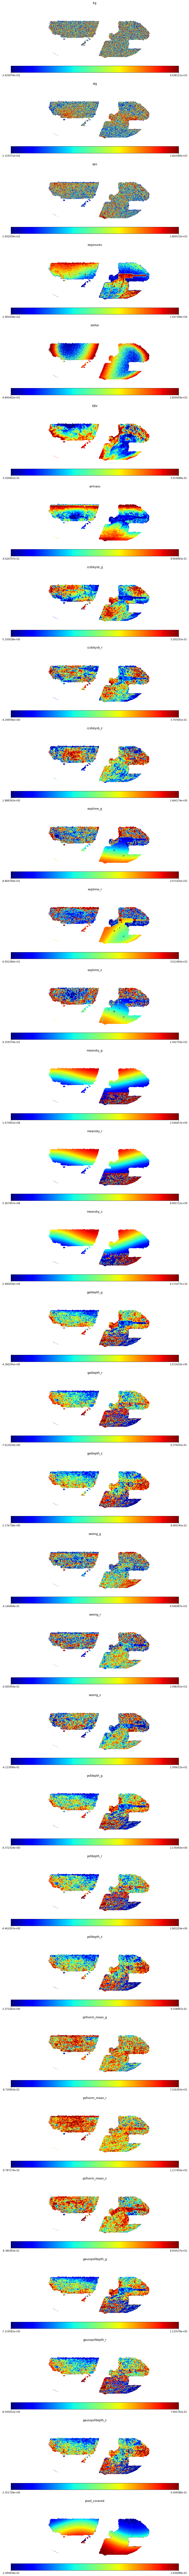

In [274]:
nrows = 32
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(200,200))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = cols[i]

    m = np.zeros(NPIX)

    m[df_south.pixel_id.to_numpy()] = df_south[elem].to_numpy()
    mask = (m == 0)
    m[mask] = np.nan
    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1),format='%e', norm='hist', cmap="jet", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()



In [275]:
df_south.describe()

pixel_id            lrg            elg            qso  \
count  287075.000000  287075.000000  287075.000000  287075.000000   
mean   418110.429599      33.668449     128.415292     162.053136   
std    166764.257458      13.200295      28.050569      35.216174   
min    163021.000000       1.000000       1.000000       1.000000   
25%    280486.500000      26.000000     114.000000     145.000000   
50%    387595.000000      32.000000     128.000000     161.000000   
75%    549476.500000      39.000000     142.000000     178.000000   
max    757954.000000     676.000000    2936.000000    2040.000000   

           exposures        stellar            EBV        airmass  \
count  287075.000000  287075.000000  287075.000000  287075.000000   
mean      120.363644      32.070253       0.044123       1.407593   
std       280.577425      27.666434       0.032741       0.253899   
min         6.000000       1.000000       0.000583       1.004748   
25%        64.000000      15.000000       0.022289       1.224121   
50%        78.000000      22.000000       0.035042       1.312617   
75%       165.000000      38.000000       0.055524       1.553576   
max     17612.000000    1906.000000       0.854514       2.385126   

          ccdskysb_g     ccdskysb_r  ...     psfdepth_g     psfdepth_r  \
count  287075.000000  287075.000000  ...  287075.000000  287075.000000   
mean       23.491364      22.587011  ...      23.978406      23.556820   
std         0.164324       0.193325  ...       0.304493       0.287690   
min        18.267529      18.225866  ...      18.533745      17.169754   
25%        23.411101      22.483719  ...      23.881254      23.453869   
50%        23.508265      22.604251  ...      24.048660      23.571713   
75%        23.592617      22.710698  ...      24.160593      23.701723   
max        24.377570      23.149384  ...      25.080976      24.621117   

          psfdepth_z  psfnorm_mean_g  psfnorm_mean_r  psfnorm_mean_z  \
count  287075.000000   287075.000000   287075.000000   287075.000000   
mean       22.535394        0.120411        0.138241        0.141791   
std         0.271582        0.198393        1.976570        0.198035   
min        14.272323        0.034474        0.043617        0.052015   
25%        22.450152        0.108707        0.122127        0.127522   
50%        22.584226        0.117784        0.133008        0.141522   
75%        22.698490        0.127410        0.142811        0.153487   
max        27.549091       72.386925     1044.366089       89.735524   

       gausspsfdepth_g  gausspsfdepth_r  gausspsfdepth_z  pixel_covered  
count    287075.000000    287075.000000    287075.000000  287075.000000  
mean         24.156238        23.716935        22.719599       0.998531  
std           0.297956         0.297722         0.277108       0.013345  
min          17.070867        15.224684        14.403269       0.750000  
25%          24.062563        23.622606        22.636157       1.000000  
50%          24.220426        23.738571        22.767283       1.000000  
75%          24.329039        23.868581        22.884809       1.000000  
max          25.217281        24.576412        27.705493       1.000000  

[8 rows x 33 columns]

In [ ]:


df_south.head()

## Working on splitting the dataset south into south + DES mirroring the Chaussidon paper

In [ ]:
df_des = df_south[df_south.exposures > 30]



In [ ]:
m = np.zeros(NPIX)

    m[df_south.pixel_id.to_numpy()] = df_south[elem].to_numpy()
    mask = (m == 0)
    m[mask] = np.nan
    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1),format='%e', norm='hist', cmap="jet", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)

In [ ]:
# exploring the overlap:

intersection = pd.Series(list(set(df_north.BrickID) & set(df_south.BrickID)))
print(len(intersection))

In [ ]:
print(len(df_north.BrickID.unique()))
print(len(df_south.BrickID.unique()))
print(len(df_north.BrickID.unique()) + len(df_south.BrickID.unique()))

In [ ]:
df = pd.concat((df_south, df_north), axis=0)


In [ ]:
df_intersect = df[~(df['BrickID'].isin(intersection))]

In [ ]:
print(len(df))
print(len(df_intersect))

In [ ]:
print(df.shape)
duplicates_removed = df.drop_duplicates()

print(duplicates_removed.shape)

In [ ]:
df = duplicates_removed

print(len(df.BrickID.unique()))

In [ ]:
print(df.isna().sum())

In [ ]:
# Removing all Lines with Nan that were added to ensure that all bricks are stored
df_objects = df.dropna(axis=0, inplace=False, how='any')

print(len(df_objects.BrickID.unique()))
print(len(df_objects))

In [ ]:
df_objects.head()

### 2. Get Galaxy Count per Healpy Pixel


In [ ]:
# LRG

df_LRG = df_objects[df_objects["LRG"] == 1]
ra_LRG = df_LRG["RA"].to_numpy(copy=True)
dec_LRG = df_LRG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_LRG, dec_LRG)

print("Number of LRGs in Sample:", len(ra_LRG))

LRG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(LRG_pixel_indices, return_counts=True)

print(unique)

mean_LRG = counts.mean()
print("Mean LRGs per Pixel:", mean_LRG)
# Calculating Densities for every block

#density_LRG = (counts / mean_LRG) - 1
id_density = np.stack((unique, counts), axis=1)
#print(id_density)
df_lrg = pd.DataFrame(id_density, columns=['pixel_id', 'lrg'])
df_lrg.pixel_id = df_lrg.pixel_id.astype(int)
df_lrg.head()

In [ ]:
# elg

df_ELG = df_objects[df_objects["ELG"] == 1]
ra_ELG = df_ELG["RA"].to_numpy(copy=True)
dec_ELG = df_ELG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_ELG, dec_ELG)

print("Number of ELGs in Sample:", len(ra_ELG))

ELG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(ELG_pixel_indices, return_counts=True)

print(unique)

mean_ELG = counts.mean()
print("Mean ELGs per Pixel:", mean_ELG)
# Calculating Densities for every block
#density_ELG = (counts / mean_ELG) - 1
id_density = np.stack((unique, counts), axis=1)
print(id_density)
df_elg = pd.DataFrame(id_density, columns=['pixel_id', 'elg'])
df_elg.pixel_id = df_elg.pixel_id.astype(int)

print(df_elg.head())

In [ ]:
df_QSO = df_objects[df_objects["QSO"] == 1]
ra_QSO = df_QSO["RA"].to_numpy(copy=True)
dec_QSO = df_QSO["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_QSO, dec_QSO)

print("Number of QSOs in Sample:", len(ra_QSO))

QSO_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(QSO_pixel_indices, return_counts=True)

print(unique)

mean_QSO = counts.mean()
print("Mean QSOs per Pixel:", mean_QSO)
# Calculating Densities for every block
#density_QSO = (counts / mean_QSO) - 1
id_density = np.stack((unique, counts), axis=1)
print(id_density)
df_qso = pd.DataFrame(id_density, columns=['pixel_id', 'qso'])
df_qso.pixel_id = df_qso.pixel_id.astype(int)

print(df_qso.head())

In [ ]:
df = pd.merge(df_lrg, df_elg, how='outer', on='pixel_id')
df = pd.merge(df, df_qso, how='outer', on='pixel_id')
print(df.isna().sum())
print(df_lrg.shape, df_elg.shape, df_qso.shape, df.shape)

In [ ]:
# Dropping all pixels where I do not have counts for all 3 types of galaxies
df.dropna(axis=0, inplace=True)
print(df.isna().sum())
print(df.shape)

### 3. Plotting Galaxy Densities

In [ ]:
m_LRG = np.zeros(NPIX)

m_LRG[df.pixel_id.to_numpy()] = df.lrg.to_numpy()
mask = (m_LRG == 0)
m_LRG[mask] = np.nan
hp.mollview(m_LRG, title="LRG", format='%i', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

In [ ]:
m_ELG = np.zeros(NPIX)

m_ELG[df.pixel_id.to_numpy()] = df.elg.to_numpy()
mask = (m_ELG == 0)
m_ELG[mask] = np.nan
hp.mollview(m_ELG, title="ELG", format='%i', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

In [ ]:
m_QSO = np.zeros(NPIX)

m_QSO[df.pixel_id.to_numpy()] = df.qso.to_numpy()
mask = (m_QSO == 0)
m_QSO[mask] = np.nan
hp.mollview(m_QSO, title="QSO", format='%i', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

In [ ]:
# Getting Exposure Densities across pixels

with open('../../bricks_data/pixel2ccd_256.pickle', 'rb') as f:
    pixel2ccd_dict = pickle.load(f)
    f.close()

In [ ]:
df = df.astype(int)
df.head()



In [ ]:
pix_ids = df.pixel_id.to_numpy()
exp_len = np.zeros(len(pix_ids))
print(pix_ids)
for i, pix in enumerate(pix_ids):
    exp_len[i] = len(pixel2ccd_dict[pix])

print(exp_len)

df['exposures'] = exp_len

df.head()

In [ ]:
df = df.astype(int)


In [ ]:
m_EXP = np.zeros(NPIX)

m_EXP[df.pixel_id.to_numpy()] = df.exposures.to_numpy()
mask = (m_EXP == 0)
m_EXP[mask] = np.nan
hp.mollview(m_EXP, title="EXP", format='%i', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

### 4. Importing the Systematics Values and Appending them to the df.


#### a. Stellar Density

In [ ]:
df_stellar_north = pd.read_csv('../../bricks_data/stellar_catalogue_north.csv')


In [ ]:
df_stellar_south = pd.read_csv('../../bricks_data/stellar_catalogue_south.csv')

In [ ]:
df_stellar_north.head()

In [ ]:
print(len(df_stellar_north) + len(df_stellar_south))

In [ ]:
df_stellar = pd.concat((df_stellar_south, df_stellar_north), axis=0)


In [ ]:
label_1 = 'RMAG'
label_2 = 'GMAG'

plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()

In [ ]:
# REMOVING OUTLIERS
print(df_stellar.shape)

In [ ]:
df_stellar['GMR'] = df_stellar['GMAG'] - df_stellar['RMAG']
df_stellar['RMZ'] = df_stellar['RMAG'] - df_stellar['ZMAG']

In [ ]:
df_stellar = df_stellar[(df_stellar['GMAG'] > 15) & (df_stellar['GMAG'] < 30)]
df_stellar = df_stellar[(df_stellar['ZMAG'] > 15) & (df_stellar['ZMAG'] < 30)]
df_stellar = df_stellar[(df_stellar['GMR'] > -2) & (df_stellar['GMR'] < 4)]
df_stellar = df_stellar[(df_stellar['RMZ'] > -2) & (df_stellar['RMZ'] < 4)]
print(df_stellar.shape)


In [ ]:
plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()


In [ ]:
#Dividing RMAG Column into 1000 equally filled bins (assuming within the RMAG of 17-18 this is somewhat uniform)
df_stellar['percent_RMAG'] = pd.qcut(df_stellar['RMAG'], q=10000, labels=False)
df_stellar['percent_RMAG'].value_counts()


In [ ]:
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_RMAG')
zscore = lambda x: abs((x - x.median()) / x.std())
df_stellar['Z_SCORE_RMZ'] = grouped['RMZ'].transform(zscore)
df_stellar['Z_SCORE_GMR'] = grouped['GMR'].transform(zscore)

In [ ]:
#Dividing RMAG Column into 100 equally filled bins (assuming within the RMAG of 17-18 this is somewhat uniform)
df_stellar['percent_GMR'] = pd.qcut(df_stellar['GMR'], q=10000, labels=False)
df_stellar['percent_RMZ'] = pd.qcut(df_stellar['RMZ'], q=10000, labels=False)
df_stellar.shape

In [ ]:
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_GMR')
df_stellar['Z_SCORE_RMZ'] = grouped['RMZ'].transform(zscore)


In [ ]:
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_RMZ')
df_stellar['Z_SCORE_GMR'] = grouped['GMR'].transform(zscore)

In [ ]:
print(df_stellar.shape)
df_stellar = df_stellar[(df_stellar['Z_SCORE_GMR'] < 3)]
print(df_stellar.shape)
df_stellar = df_stellar[(df_stellar['Z_SCORE_RMZ'] < 3)]
df_stellar.shape

In [ ]:
label_1 = 'GMR'
label_2 = 'RMZ'

plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()

In [ ]:
ra_stellar = df_stellar["RA"].to_numpy(copy=True)
dec_stellar = df_stellar["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_stellar, dec_stellar)

print("Number of stellars in Sample:", len(ra_stellar))

stellar_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(stellar_pixel_indices, return_counts=True)

print(unique)

mean_stellar = counts.mean()
print("Mean stellars per Pixel:", mean_stellar)
# Calculating Densities for every block
density_stellar = (counts / mean_stellar) - 1
id_density = np.stack((unique, counts), axis=1)
print(id_density)
df_stellar = pd.DataFrame(id_density, columns=['pixel_id', 'stellar'])
df_stellar.pixel_id = df_stellar.pixel_id.astype(int)

print(df_stellar.head())

print(df_stellar.isna().sum())

In [ ]:
df = df.merge(df_stellar, how='inner', on='pixel_id')
print(df.isna().sum())
df.shape

In [ ]:
df.head()

In [ ]:
m_Stellar = np.zeros(NPIX)

m_Stellar[df.pixel_id.to_numpy()] = df.stellar.to_numpy()
mask = (m_Stellar == 0)
m_Stellar[mask] = np.nan
hp.mollview(m_Stellar, title="Stellar", format='%e', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0),
            badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()

#### EBV Extraction

In [ ]:
from astropy.coordinates import SkyCoord, Latitude, Longitude
from dustmaps.sfd import SFDQuery

In [ ]:
from dustmaps.config import config

config['data_dir'] = '/Users/edgareggert/astrostatistics/data_preprocessing/.dustmapsrc'

In [ ]:
## Getting the centers of each pixel in my corpus as RaDec

pixels_ids = df["pixel_id"].to_numpy()
print(pixels_ids)
subpixel_coords = hp.pix2ang(NSIDE, pixels_ids, lonlat=True)
ra_ebv = subpixel_coords[0]
dec_ebv = subpixel_coords[1]

In [ ]:
#Querying their position on the SFD dustmap
sfd = SFDQuery()
coords = SkyCoord(ra_ebv, dec_ebv, frame='icrs', unit='deg')
ebv = sfd(coords)

df["EBV"] = ebv

In [ ]:
df.EBV.describe()
df.head()


In [ ]:
m_EBV = np.zeros(NPIX)

m_EBV[df.pixel_id.to_numpy()] = df.EBV.to_numpy()
mask = (m_EBV == 0)
m_EBV[mask] = np.nan
hp.mollview(m_EBV, title="EBV", format='%e', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

In [ ]:
df.exposures = df.exposures.astype(int)
df.head()

In [ ]:
df.to_csv('../../bricks_data/dataset_galdense.csv', index=False)



In [ ]:
df = pd.read_csv('../../bricks_data/dataset_galdense.csv',
                 dtype={'pixel_id': 'int32', 'lrg': 'int32', 'elg': 'int32', 'qso': 'int32', 'exposures': 'int32',
                        'EBV': 'float'})

#### Geometric Systematics Values, not involving edge pixels


exptime
airmass
fwhm
ccdskysb
meansky
galdepth
psfdepth
psfnorm_mean
gausspsfdepth
pixel_fraction


In [ ]:
with open('../../bricks_data/pixel2systematics_geometric_non_inclusive.pickle', 'rb') as f:
    geo_dict = pickle.load(f)
    f.close()

print(len(geo_dict.keys()))

In [ ]:
sys_list = []
for key in geo_dict.keys():
    ind_sys_list = geo_dict[key]
    ind_sys_list.append(key)
    sys_list.append(ind_sys_list)

df_sys_geo_no = pd.DataFrame(sys_list, columns=['airmass',
                                                'ccdskysb_g',
                                                'ccdskysb_r',
                                                'ccdskysb_z',
                                                'exptime_g',
                                                'exptime_r',
                                                'exptime_z',
                                                'meansky_g',
                                                'meansky_r',
                                                'meansky_z',
                                                'galdepth_g',
                                                'galdepth_r',
                                                'galdepth_z',
                                                'seeing_g',
                                                'seeing_r',
                                                'seeing_z',
                                                'psfdepth_g',
                                                'psfdepth_r',
                                                'psfdepth_z',
                                                'psfnorm_mean_g',
                                                'psfnorm_mean_r',
                                                'psfnorm_mean_z',
                                                'gausspsfdepth_g',
                                                'gausspsfdepth_r',
                                                'gausspsfdepth_z',
                                                'pixel_covered',
                                                'pixel_id'])



In [ ]:
print(len((df_sys_geo_no)))

In [ ]:
df_geo = df.merge(df_sys_geo_no, how='inner', on='pixel_id')
print(len(df))
print(len(df_geo))

In [ ]:
print(df_geo.isna().sum())

In [ ]:
df_geo.dropna(axis=0, inplace=True)
print(df_geo.isna().sum())

In [ ]:
print(df_geo.describe())

In [ ]:
df_geo.to_csv('../../bricks_data/dataset_geometric.csv', index=False)


#### Plotting All Densities and systematics together


In [ ]:
df_geo = pd.read_csv('../../bricks_data/dataset_geometric.csv',
                     dtype={'pixel_id': 'int32', 'lrg': 'int32', 'elg': 'int32', 'qso': 'int32', 'exposures': 'int32',
                            'EBV': 'float'})

In [ ]:
cols = list(df_geo.columns)
cols.remove('pixel_id')


In [ ]:
df_geo.head()

In [ ]:
nrows = 32
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(200,200))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = cols[i]

    m = np.zeros(NPIX)

    m[df_geo.pixel_id.to_numpy()] = df_geo[elem].to_numpy()
    mask = (m == 0)
    m[mask] = np.nan
    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1),format='%e', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()


### 5. Outlier Removal

In [ ]:
df_geo = pd.read_csv('../../bricks_data/dataset_geometric.csv',
                     dtype={'pixel_id': 'int32', 'lrg': 'int32', 'elg': 'int32', 'qso': 'int32', 'exposures': 'int32',
                            'EBV': 'float'})

df_geo.describe()


#### a. Experiment with densities


In [ ]:
df_geo['lrg_n'] = (df_geo['lrg']/df_geo.lrg.mean()) - 1
df_geo['elg_n'] = (df_geo['elg']/df_geo.elg.mean()) - 1
df_geo['qso_n'] = (df_geo['qso']/df_geo.qso.mean()) - 1


zscore = lambda x: abs((x - x.median()) / x.std())

In [ ]:
print(len(df_geo[df_geo.lrg_n > 1]), round(df_geo.lrg_n.mean()))
print(len(df_geo[df_geo.elg_n > 1]), round(df_geo.elg_n.mean()))
print(len(df_geo[df_geo.qso_n > 1]), round(df_geo.qso_n.mean()))

In [ ]:
print(df_geo.shape)
df_geo['Z'] = df_geo['galdepth_g'].transform(zscore)
df_geo = df_geo[(df_geo['Z'] < 3)]
df_geo['Z'] = df_geo['galdepth_r'].transform(zscore)
df_geo = df_geo[(df_geo['Z'] < 3)]
df_geo['Z'] = df_geo['galdepth_z'].transform(zscore)
df_geo = df_geo[(df_geo['Z'] < 3)]
print(df_geo.shape)


In [ ]:
print(len(df_geo[df_geo.lrg_n > 1]), (df_geo.lrg_n.mean()))
print(len(df_geo[df_geo.elg_n > 1]), (df_geo.elg_n.mean()))
print(len(df_geo[df_geo.qso_n > 1]), (df_geo.qso_n.mean()))

df_geo = df_geo[(df_geo['exposures'] < 300)]
df_geo = df_geo[(df_geo['exposures'] > 5)]

print(len(df_geo[df_geo.lrg_n > 1]), (df_geo.lrg_n.mean()))
print(len(df_geo[df_geo.elg_n > 1]), (df_geo.elg_n.mean()))
print(len(df_geo[df_geo.qso_n > 1]), (df_geo.qso_n.mean()))

In [ ]:
zscore = lambda x: abs((x - x.median()) / x.std())
col = list(df_geo.columns)
df_no_outlier = df_geo


#### Removing All Outliers


In [ ]:
df_no_outlier = df_geo
factor = 10
print(len(df_geo))
for elem in col:
    if elem == 'stellar':
        factor = 10
    df_no_outlier['Z'] = df_no_outlier[elem].transform(zscore)
    print("Element: ", elem, "| No of Elems with Z higher than factor  : ", len(df_no_outlier[(df_no_outlier['Z'] > factor)]))
    df_no_outlier = df_no_outlier[(df_no_outlier['Z'] < factor)]

print()
print(f"Galaxies Remaining before outlier removal: {len(df_geo)}")
print(f"Galaxies Remaining after outlier removal: {len(df_no_outlier)}")
print(f"Elements cut by outlier removal: {len(df_geo) - len(df_no_outlier)}")

In [ ]:
#df_no_outlier = df_geo

df_no_outlier.describe()
print(df_no_outlier.shape)
print(df_no_outlier.exposures.max())

df_no_outlier = df_no_outlier[df_no_outlier.exposures < 300]
print(df_no_outlier.shape)

df_no_outlier.exposures.max()


### Scaling the Data

In [ ]:
scaler = MinMaxScaler()
#scaler = RobustScaler()

df_scaled = df_no_outlier

cololo = list(df_scaled.columns)
cololo.remove('pixel_id')

df_scaled[cololo] = scaler.fit_transform(df_no_outlier[cololo])

df_scaled.describe()

### Separating train, test and validation sets

In [ ]:
df_train, df_val = train_test_split(df_scaled, test_size=0.4, random_state=666, shuffle=True)
df_val, df_test = train_test_split(df_val, test_size=0.5, random_state=666, shuffle=True)

total = len(df_train) + len(df_test) + len(df_val)

print(len(df_train)/total)
print(len(df_val)/total)
print(len(df_test)/total)

In [ ]:
df_train.describe()

In [ ]:
df_val.describe()

In [ ]:
df_test.describe()

In [ ]:
df_train.to_csv('../../bricks_data/train.csv', index=False)
df_val.to_csv('../../bricks_data/val.csv', index=False)
df_test.to_csv('../../bricks_data/test.csv', index=False)


### Plotting all different types of outliers that are removed

#### a. exposures


In [ ]:
zscore = lambda x: abs((x - x.median()) / x.std())

df_geo = pd.read_csv('../../bricks_data/dataset_geometric.csv',
                     dtype={'pixel_id': 'int32', 'lrg': 'int32', 'elg': 'int32', 'qso': 'int32', 'exposures': 'int32',
                            'EBV': 'float'})

In [ ]:

plt.hist(df_geo.exposures, range=[0, 300])
df_no_outlier = df_geo

In [ ]:
elem = 'exposures'

df_no_outlier['Z'] = df_geo[elem].transform(zscore)

df_outlier = df_no_outlier[(df_no_outlier['exposures'] > 100)]

m = np.zeros(NPIX)

m[df_outlier.pixel_id.to_numpy()] = 1
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title=elem, min=-5, max=2, cbar=False, cmap="Reds", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

plt.show()

#### b. pixel_id -> Plotting State of Current Catalogue



In [ ]:
elem = 'pixel_id'

df_no_outlier['Z'] = df_geo[elem].transform(zscore)

df_outlier = df_no_outlier[(df_no_outlier['Z'] < 3)]

m = np.zeros(NPIX)

m[df_outlier.pixel_id.to_numpy()] = 1
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title=elem, min=-5, max=2, cbar=False, cmap="Reds", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

plt.show()

#### c. lrg


In [ ]:
elem = 'lrg'

df_no_outlier['Z'] = df_geo[elem].transform(zscore)

df_outlier = df_no_outlier[(df_no_outlier['Z'] > 3)]

m = np.zeros(NPIX)

m[df_outlier.pixel_id.to_numpy()] = 1
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title=elem, min=-5, max=2, cbar=False, cmap="Reds", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

plt.show()

#### d. elg


In [ ]:
elem = 'elg'

df_no_outlier['Z'] = df_geo[elem].transform(zscore)

df_outlier = df_no_outlier[(df_no_outlier['Z'] > 3)]

m = np.zeros(NPIX)

m[df_outlier.pixel_id.to_numpy()] = 1
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title=elem, min=-5, max=2, cbar=False, cmap="Reds", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

plt.show()

#### e. qso


In [ ]:
elem = 'qso'

df_no_outlier['Z'] = df_geo[elem].transform(zscore)

df_outlier = df_no_outlier[(df_no_outlier['Z'] > 3)]

m = np.zeros(NPIX)

m[df_outlier.pixel_id.to_numpy()] = 1
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title=elem, min=-5, max=2, cbar=False, cmap="Reds", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

plt.show()

#### e. stellar


In [ ]:
elem = 'stellar'

df_no_outlier['Z'] = df_geo[elem].transform(zscore)

df_outlier = df_no_outlier[(df_no_outlier['Z'] > 3)]

m = np.zeros(NPIX)

m[df_outlier.pixel_id.to_numpy()] = 1
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title=elem, min=-5, max=2, cbar=False, cmap="Reds", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

plt.show()

#### f. EBV



In [ ]:
elem = 'EBV'

df_no_outlier['Z'] = df_geo[elem].transform(zscore)

df_outlier = df_no_outlier[(df_no_outlier['Z'] > 3)]

m = np.zeros(NPIX)

m[df_outlier.pixel_id.to_numpy()] = 1
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title=elem, min=-5, max=2, cbar=False, cmap="Reds", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

plt.show()

#### g. exptime_g

In [ ]:
elem = 'exptime_g'

df_no_outlier['Z'] = df_geo[elem].transform(zscore)

df_outlier = df_no_outlier[(df_no_outlier['Z'] > 3)]

m = np.zeros(NPIX)

m[df_outlier.pixel_id.to_numpy()] = 1
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title=elem, min=-5, max=2, cbar=False, cmap="Reds", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

plt.show()


#### Plotting All combined

In [ ]:
cols = list(df_geo.columns)
cols.remove('pixel_id')
cols.remove('Z')
print(len(cols))

In [ ]:
nrows = 25
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(150,150))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = cols[i]
    df_no_outlier['Z'] = df_geo[elem].transform(zscore)

    df_outlier = df_no_outlier[(df_no_outlier['Z'] > 3)]

    m = np.zeros(NPIX)

    m[df_outlier.pixel_id.to_numpy()] = 1
    mask = (m == 0)
    m[mask] = np.nan

    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1), min=-5, max=2, cbar=False, cmap="Reds", notext=False,
                rot=(100, 0, 0), badcolor='white',
                remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()
